Este artigo, tem como objetivo a explanação do uso do método de previsão de séries temporais, o ARIMA, bem como abordagem de técnicas de limpeza de dados e visualização utilizando o Pyplot.


Neste kernel, usei fontes de dados multiplas que são operações de bombardeio aéreo e condições climáticas na Segunda Guerra Mundial. Após esse ponto, usarei a sigla ww2 para a 2ª Guerra Mundial. Começaremos com a descrição e a limpeza dos dados, depois visualizaremos nossos dados para entender melhor. Esses processos podem ser chamados de AED (Análise Exploratória de Dados). Depois disso, focaremos na previsão de séries temporais para prever quando as operações de bombardeio são realizadas. Para previsão de séries temporais, usaremos o método ARIMA, que será um tutorial.

Entendendo o ARIMA
Em estatística e econometria, particularmente em análise de séries temporais, um modelo auto-regressivo integrado de médias móveis (autoregressive integrated moving average ou ARIMA, na sigla em inglês) é uma generalização de um modelo auto-regressivo de médias móveis (ARMA). Ambos os modelos são ajustados aos dados da série temporal para entender melhor os dados ou para prever pontos futuros na série. Modelos ARIMA são aplicados em alguns casos em que os dados mostram evidências de não estacionariedade, em que um passo inicial de diferenciação (correspondente à parte "integrada" do modelo) pode ser aplicado uma ou mais vezes para eliminar a não estacionariedade.

 A parte auto-regressiva (AR) do modelo ARIMA indica que a variável evoluinte de interesse é regressada em seus próprios valores defasados, isto é, anteriores. A parte de média móvel (MA) indica que o erro de regressão é na verdade uma combinação linear dos termos de erro, cujos valores ocorreram contemporaneamente e em vários momentos no passado. A parte integrada (I) indica que os valores de dados foram substituídos com a diferença entre seus valores e os valores anteriores e este processo diferenciador pode ter sido realizado mais de uma vez. O propósito da cada uma destas características é fazer o modelo se ajustar aos dados da melhor forma possível.

In [1]:
#O Ambiente utilizado é Python 3 que vem com muitas bibliotecas de análise úteis 
#instaladas

import numpy as np # para algebra linear
import pandas as pd # processamento de dados, arquivos CSV I/O (expl: pd.read_csv)
import seaborn as sns  #biblioteca de visualização
import matplotlib.pyplot as plt  #biblioteca de visualização
import chart_studio.plotly as py #biblioteca de visualização
from plotly.offline import init_notebook_mode, iplot # modo offline do plotly
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # objeto de gráfico do plotly

In [2]:
# Os arquivos de dados de entrada estão disponíveis no diretório "/home/nelson/Documents/Script Python/Time Series Prediction Tutorial with EDA"
# deveram colocar o caminho onde estará os arquivos CVS disponibilizados
import os
# no código abaixo como saída terão os arquivos contidos na pasta
print(os.listdir("../input/"))
                 

['Weather_Station_Locations_dataset.csv', 'operations_dataset.csv', 'Summary_of_Weather_dataset.csv']


In [3]:
# importar bibliotecas de avisos
import warnings

#ignorar filtros
warnings.filterwarnings("ignore") # Se houver um aviso após alguns códigos, 
#isso nos evitará vê-los.

# estilos de plots. o ggplot é um dos estilos mais usados.
# todos os resultados que você escreve no diretorio atual são salvos como saída
plt.style.use('ggplot') 

Carregar os dados.
Como mencionei na introdução, usei várias fontes de dados.
Operações de bombardeio aéreo na Segunda Guerra Mundial
Resumindo, esses dados incluem operações de bombardeio. Por exemplo, os EUA que usam a bomba do aeroporto de Ponte Olivo na Alemanha (Berlim) com aeronaves A36 em 1945.
Condições climáticas na Segunda Guerra Mundial
Resumindo, condições climáticas durante a segunda guerra mundial. Por exemplo, de acordo com a estação meteorológica da cidade de George Town, a temperatura média é 23,88 em 01/07/1942.
Este conjunto de dados possui 2 subconjuntos. O primeiro inclui localizações de estações meteorológicas como país, latitude e longitude.
O segundo inclui temperaturas mínimas, máximas e médias medidas de estações meteorológicas

In [4]:
#datas de bombardeios
aerial = pd.read_csv("../input/operations_dataset.csv")

# primeiros dados meteorológicos que incluem locais como país, latitude e longitude.
weather_station_location = pd.read_csv("../input/Weather_Station_Locations_dataset.csv")
# Dados climáticos secundários que incluem temperaturas mínimas, máximas e médias medidas
weather = pd.read_csv("../input/Summary_of_Weather_dataset.csv")


Descrição de dados
Explico apenas os recursos de dados que usaremos neste kernel.
Bombardeio aéreo Descrição dos dados:
 - Data da Missão: Data da Missão
 - Teatro de Operações: região em que operações militares ativas estão em andamento; "o exército estava em campo aguardando ação"; Exemplo: "ele serviu no Vietnã por três anos"
 - País: País que faz missão ou operação como EUA
 - Força Aérea: Nome ou ID da unidade da Força Aérea como 5AF
 - Série de aeronaves: modelo ou tipo de aeronave como B24
 - Indicativo: Antes do ataque à bomba, mensagem, código, anúncio ou sintonia transmitida por rádio.
 - Base de decolagem: nome do aeroporto de decolagem como o Ponte Olivo Airfield
 - Local da decolagem: região da decolagem Sicília
 - Latitude de decolagem: latitude da região de decolagem
 - Longitude de decolagem: Longitude da região de decolagem
 - País de destino: país de destino como a Alemanha
 - Segmentar cidade: segmente cidade como Berlim
 - Tipo de destino: tipo de destino como área da cidade
 - Indústria-alvo: alvo industy como cidade ou urbano
 - Prioridade de destino: segmente como 1 (a maioria)
 - Latitude do alvo: latitude do alvo
 - Longitude alvo: Longitude alvo
 
Descrição dos dados da condição climática:
 Localização da estação meteorológica:
  - WBAN: Número da estação meteorológica
  - NAME: nome da estação meteorológica
  - ID DO ESTADO / PAÍS: acrônimo de países
  - Latitude: latitude da estação meteorológica
  - Longitude: Longitude da estação meteorológica

Clima:
 - STA: número da estação meteorológica (WBAN)
 - Data: Data da medição da temperatura
 - MeanTemp: temperatura média
 
Limpeza de Dados
 Os dados do bombardeio aéreo incluem muito valor de NaN. Em vez de usá-los, ignoro alguns valores de NaN. Ele não apenas remove a incerteza, mas também facilita o processo de visualização
 - Ignorar países que são NaN
 - Ignorar se a longitude alvo for NaN
 - Ignorar se a longitude da decolagem for NaN
 - Descartar recursos não utilizados
 
Os dados da condição climática não precisam de limpeza. De acordo com a análise e visualização exploratória de dados, escolhi um determinado local para examinar mais profundamente. No entanto, vou colocar as variáveis de dados no que uso apenas.

In [5]:
# ignorar países que são NaN
aerial = aerial[pd.isna(aerial.Country)==False]

# Ignorar se a longitude alvo for NaN
aerial = aerial[pd.isna(aerial['Target Longitude'])==False]

# Ignorar se a longitude da decolagem for NaN
aerial = aerial[pd.isna(aerial['Takeoff Longitude'])==False]

# Descartar recursos não utilizado
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']

aerial.drop(drop_list, axis=1,inplace = True)
aerial = aerial[ aerial.iloc[:,8]!="4248"] # ignora esta latitude de lançamento 
aerial = aerial[ aerial.iloc[:,9]!=1355]   # ignora esta longitude de lançamento

aerial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 0 to 178080
Data columns (total 17 columns):
Mission Date             2555 non-null object
Theater of Operations    2555 non-null object
Country                  2555 non-null object
Air Force                2505 non-null object
Aircraft Series          2528 non-null object
Callsign                 10 non-null object
Takeoff Base             2555 non-null object
Takeoff Location         2555 non-null object
Takeoff Latitude         2555 non-null object
Takeoff Longitude        2555 non-null float64
Target Country           2499 non-null object
Target City              2552 non-null object
Target Type              602 non-null object
Target Industry          81 non-null object
Target Priority          230 non-null object
Target Latitude          2555 non-null float64
Target Longitude         2555 non-null float64
dtypes: float64(3), object(14)
memory usage: 359.3+ KB


In [6]:
# Somente o que irei utilizar
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
WBAN                161 non-null int64
NAME                161 non-null object
STATE/COUNTRY ID    161 non-null object
Latitude            161 non-null float64
Longitude           161 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [7]:
# Somente o que iremos utililizar
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
STA         119040 non-null int64
Date        119040 non-null object
MeanTemp    119040 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


Visualização de dados
 Vou começar com noções básicas de visualização que compreendem dados
 - Quantos países quais ataques
 - Principais países-alvo
 - As 10 melhores séries de aeronaves
 - Localizações base da decolagem (países de Ataque)
 - Locais de destino 
 - Caminhos de bombardeio
 - Teatro de Operações
 - Localizações das estações meteorológicas

USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64


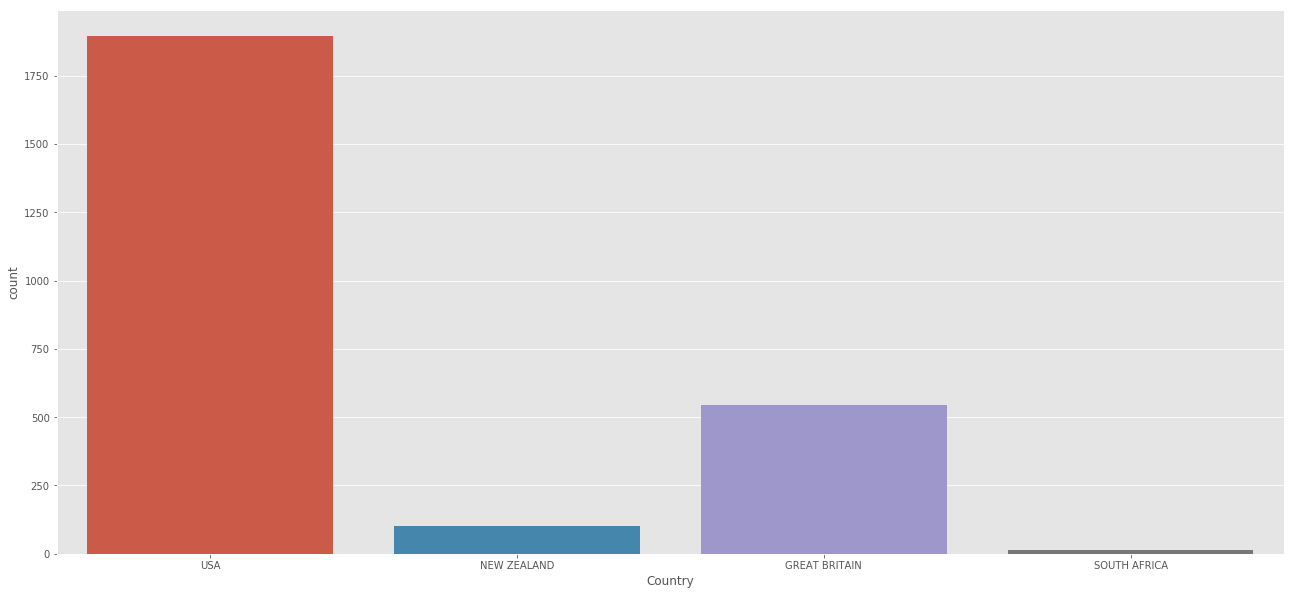

In [8]:
# País
print(aerial['Country'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Country'])
plt.show()

ITALY      1104
BURMA       335
LIBYA       272
TUNISIA     113
GREECE       87
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      41
Name: Target Country, dtype: int64


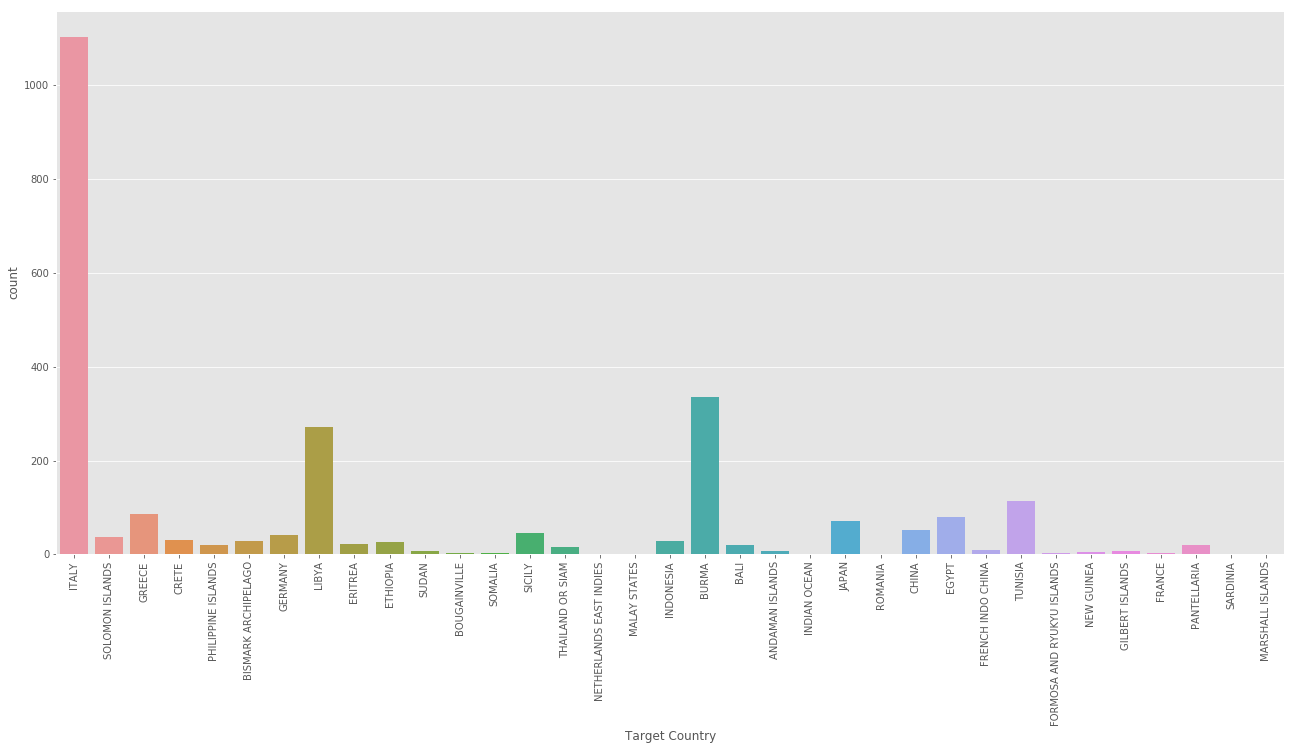

In [9]:
# Principais países-alvo
print(aerial['Target Country'].value_counts()[:10])
plt.figure(figsize=(22,10))
sns.countplot(aerial['Target Country'])
plt.xticks(rotation=90)
plt.show()

In [10]:
# As 10 melhores séries de aeronaves
data = aerial['Aircraft Series'].value_counts()
print(data[:10])
data = [go.Bar(
            x=data[:10].index,
            y=data[:10].values,
            hoverinfo = 'text',
            marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
    )]

layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

A36             990
B25             416
B24             337
BLEN            180
LIB             145
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: Aircraft Series, dtype: int64


Arenonave mais utilizada é o A36 Agora vamos visualizar as bases dos países que atacam Na plot abaixo, a cor azul chama a atenção, são os EUA e a cor vermelha é a Grã-Bretanha

In [11]:
aerial.head()

Mission Date Theater of Operations Country Air Force Aircraft Series  \
0    8/15/1943                   MTO     USA     12 AF             A36   
2    8/15/1943                   MTO     USA     12 AF             A36   
3    8/15/1943                   MTO     USA     12 AF             A36   
8    8/15/1943                   MTO     USA     12 AF             A36   
9    8/15/1943                   MTO     USA     12 AF             A36   

  Callsign          Takeoff Base Takeoff Location Takeoff Latitude  \
0      NaN  PONTE OLIVO AIRFIELD           SICILY        37.131022   
2      NaN  PONTE OLIVO AIRFIELD           SICILY        37.131022   
3      NaN  PONTE OLIVO AIRFIELD           SICILY        37.131022   
8      NaN  PONTE OLIVO AIRFIELD           SICILY        37.131022   
9      NaN  PONTE OLIVO AIRFIELD           SICILY        37.131022   

   Takeoff Longitude Target Country  Target City Target Type  \
0          14.321464          ITALY    SPADAFORA         NaN   
2          14.321464          ITALY      COSENZA         NaN   
3          14.321464          ITALY  GIOJA TAURO         NaN   
8          14.321464          ITALY       SCILLA         NaN   
9          14.321464          ITALY  GIOJA TAURO         NaN   

                Target Industry Target Priority  Target Latitude  \
0                           NaN             NaN            38.22   
2                           NaN             NaN            39.27   
3                           NaN             NaN            38.43   
8                           NaN             NaN            38.23   
9  ARMAMENT AND ORDNANCE PLANTS             NaN            38.43   

   Target Longitude  
0             15.37  
2             16.25  
3             15.90  
8             15.72  
9             15.90

In [12]:
#Ataques
aerial["color"] = ""
aerial.color[aerial.Country == "USA"] = "rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"

data = [dict(
    type='scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),
)]
layout = dict(
    title = 'Countries Take Off Bases ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Ok, agora vou visualizar os trajetos de bombardeio de que país a partir do qual decolam a bomba base e quais países e cidades.

In [13]:
# Trajetos do Bombardeio
# trajeto 1
airports = [ dict(
        type = 'scattergeo',
        lon = aerial['Takeoff Longitude'],
        lat = aerial['Takeoff Latitude'],
        hoverinfo = 'text',
        text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
        mode = 'markers',
        marker = dict( 
            size=5, 
            color = aerial["color"],
            line = dict(
                width=1,
                color = "white"
            )
        ))]

In [14]:
#trajeto 2
targets = [ dict(
        type = 'scattergeo',
        lon = aerial['Target Longitude'],
        lat = aerial['Target Latitude'],
        hoverinfo = 'text',
        text = "Target Country: "+aerial["Target Country"]+" Target City: "+aerial["Target City"],
        mode = 'markers',
        marker = dict( 
            size=1, 
            color = "red",
            line = dict(
                width=0.5,
                color = "red"
            )
        ))]

In [15]:
# trajeto 3
flight_paths = []
for i in range( len( aerial['Target Longitude'] ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            lon = [ aerial.iloc[i,9], aerial.iloc[i,16] ],
            lat = [ aerial.iloc[i,8], aerial.iloc[i,15] ],
            mode = 'lines',
            line = dict(
                width = 0.7,
                color = 'black',
            ),
            opacity = 0.6,
        )
    )
    
layout = dict(
    title = 'Bombing Paths from Attacker Country to Target ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
    
fig = dict( data=flight_paths + airports+targets, layout=layout )
iplot( fig )

Como você pode ver pelos caminhos dos bombardeios, a maior parte do ataque é realizada no teatro de operações do Mediterrâneo. 
 Teatro de Operações:
 - ETO: Teatro Europeu de Operação
 - PTO: Teatro de Operações do Pacífico
 - MTO: Teatro de Operações Mediterrâneo
 - CBI: China-Burma-India Theater of Operations
 - EAST AFRICA: East Africa Theater of Operations

MTO            1802
CBI             425
PTO             247
ETO              44
EAST AFRICA      37
Name: Theater of Operations, dtype: int64


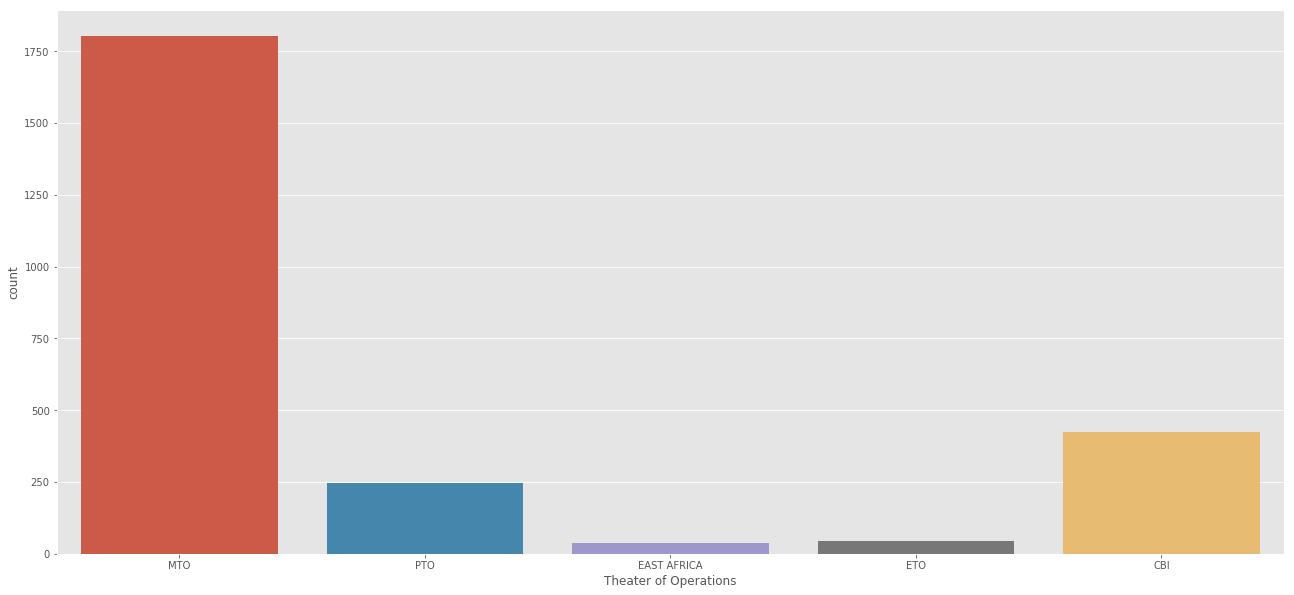

In [16]:
# Teatro de operações
print(aerial['Theater of Operations'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Theater of Operations'])
plt.show()

As localizações das estações meteorológicas estão abaixo

In [17]:
# Localizações das estações meteorológicas
data = [dict(
    type='scattergeo',
    lon = weather_station_location.Longitude,
    lat = weather_station_location.Latitude,
    hoverinfo = 'text',
    text = "Name: " + weather_station_location.NAME + " Country: " + weather_station_location["STATE/COUNTRY ID"],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 8 ,
        line = dict(width=1,color = "white"),
        color = "blue",
        opacity = 0.7),
)]
layout = dict(
    title = 'Weather Station Locations ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

- Vamos concentrar a guerra nos EUA e na BURMA
 - Nesta guerra, os EUA bombardearam BURMA (cidade de KATHA) de 1942 a 1945.
 - A estação meteorológica mais próxima a esta guerra é BINDUKURI e possui registro de temperatura de 1943 a 1945.
 - Agora vamos visualizar essa situação. Porém, antes da visualização, precisamos criar objetos de data e data e hora.

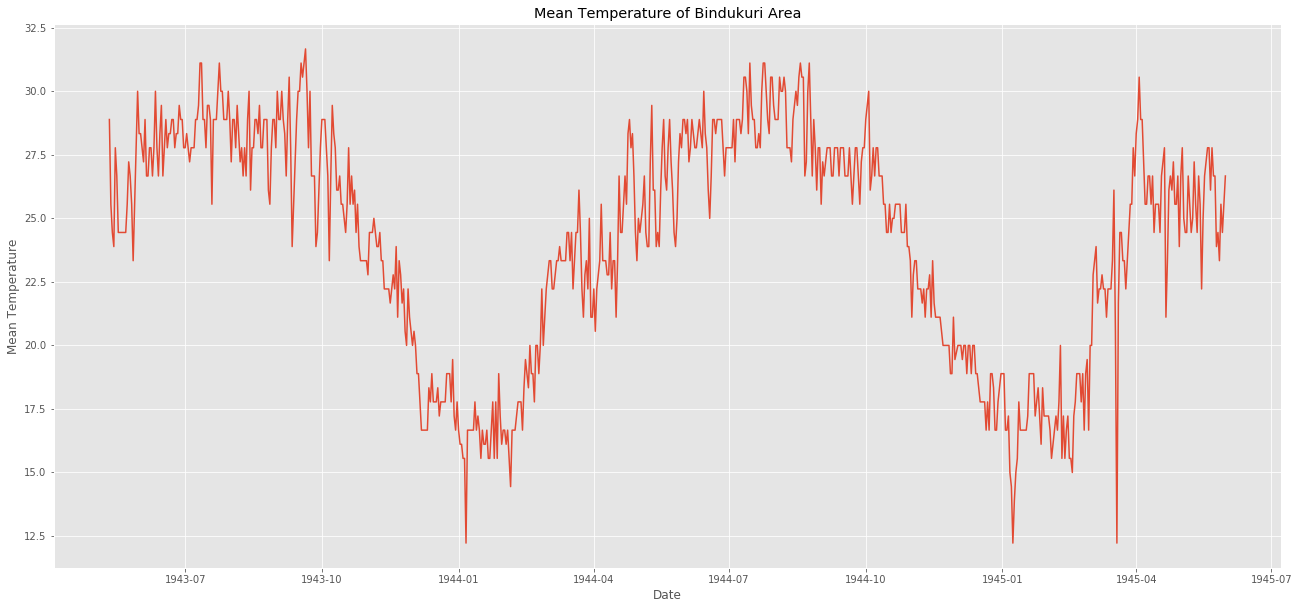

In [18]:
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN 
weather_bin = weather[weather.STA == 32907]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

 - Como você pode ver, temos medições de temperatura de 1943 a 1945.
 - A temperatura oscila entre 12 e 32 graus.
 - A temperatura dos meses de inverno é mais fria que a temperatura dos meses de verão.

In [19]:
aerial = pd.read_csv("../input/operations_dataset.csv")
aerial["year"] = [ each.split("/")[2] for each in aerial["Mission Date"]]
aerial["month"] = [ each.split("/")[0] for each in aerial["Mission Date"]]
aerial = aerial[aerial["year"]>="1943"]
aerial = aerial[aerial["month"]>="8"]

aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])

attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = aerial[aerial.Country == attack]
aerial_war = aerial_war[aerial_war["Target Country"] == target]
aerial_war = aerial_war[aerial_war["Target City"] == city]

In [20]:
liste = []
aa = []
for each in aerial_war["Mission Date"]:
    dummy = weather_bin[weather_bin.Date == each]
    liste.append(dummy["MeanTemp"].values)
aerial_war["dene"] = liste
for each in aerial_war.dene.values:
    aa.append(each[0])

# Create a trace
trace = go.Scatter(
    x = weather_bin.Date,
    mode = "lines",
    y = weather_bin.MeanTemp,
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    name = "Mean Temperature"
)
trace1 = go.Scatter(
    x = aerial_war["Mission Date"],
    mode = "markers",
    y = aa,
    marker = dict(color = 'rgba(16, 0, 200, 1)'),
    name = "Bombing temperature"
)
layout = dict(title = 'Mean Temperature --- Bombing Dates and Mean Temperature at this Date')
data = [trace,trace1]

fig = dict(data = data, layout = layout)
iplot(fig)

 - Linha verde é a temperatura média medida em Bindukuri.
 - Marcadores azuis são datas de bombardeio e temperatura de data de bombardeio.
 - Como pode ser visto no cenário, os EUA bombardeiam a altas temperaturas.
   - A questão é que podemos prever o tempo futuro e, de acordo com essa previsão, podemos saber se o bombardeio será realizado ou não.
   - Para responder a essa pergunta, vamos começar pela previsão de séries temporais.

Previsão de séries temporais com ARIMA
 - Vamos usar o método mais utilizado ARIMA
 - ARIMA : AutoRegressive Integrated Moving Average - Explicarei em seguida
 - O caminho que seguiremos:
   - O que é série temporal?
   - Estacionariedade de uma série temporal
   - Tornar uma série temporal estacionária?
   - Previsão de uma série temporal

O que são séries temporais?
 - A série temporal é uma coleção de pontos de dados coletados em intervalos de tempo constantes.
 - Depende do tempo.
 - A maioria das séries temporais tem algum tipo de tendência de sazonalidade. Por exemplo, se vendermos sorvete, provavelmente haverá vendas mais altas no verão. Portanto, esta série temporal apresenta tendências de sazonalidade.
 - Outro exemplo, vamos pensar que cortamos uma vez todos os dias durante 1 ano. Como você acha, não haverá um cenário como o número seis que aparece principalmente na temporada de verão ou o número cinco aparece principalmente em janeiro. Portanto, essa série cronológica não apresenta tendências de sazonalidade.

Estacionariedade de uma série temporal
 - Existem três critérios básicos para uma série temporal compreender se é uma série estacionária ou não.
   - As propriedades estatísticas das séries temporais, como média e variância, devem permanecer constantes ao longo do tempo para chamar séries temporais como estacionárias.
     - média constante
     - variação constante
     - autocovariância que não depende do tempo. autocovariância é covariância entre séries temporais e séries temporais defasadas.
 - Permite visualizar e verificar a tendência de sazonalidade de nossas séries temporais.

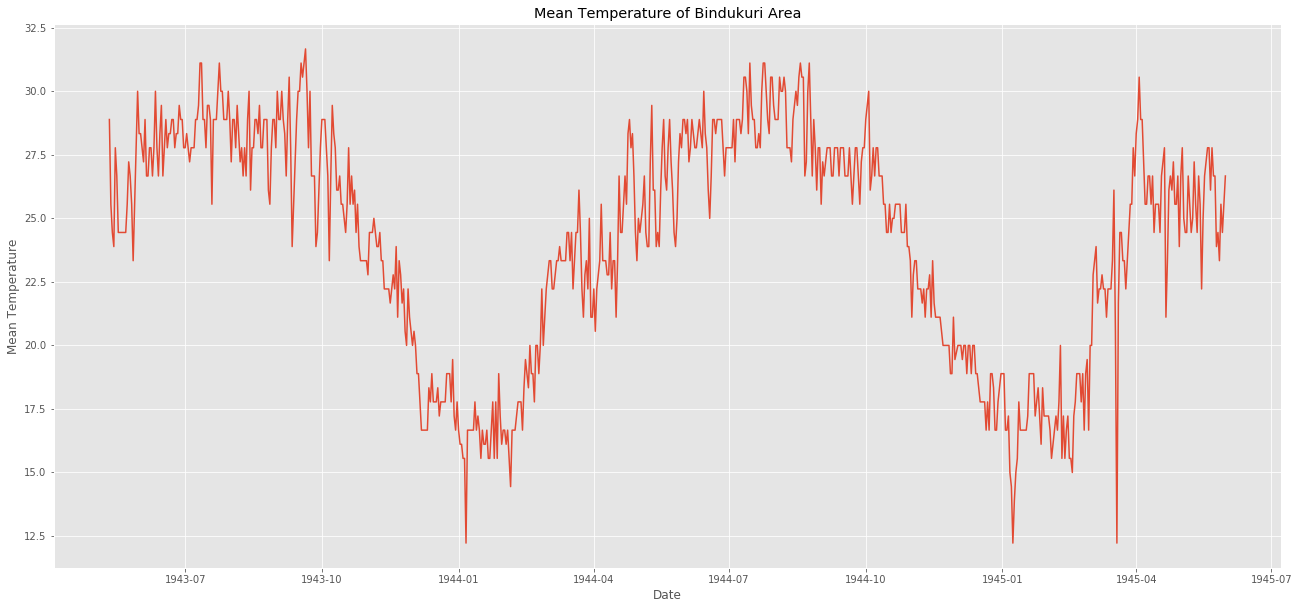

In [21]:
# Temperatura média da área de Bindikuri
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

# permite criar séries temporais a partir do tempo
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)

- Como você pode ver no gráfico acima, nossas séries temporais apresentam variações sazonais. No verão, a temperatura média é mais alta e no inverno a temperatura média é mais baixa a cada ano.
 - Agora vamos verificar estacionário de séries temporais. Podemos verificar a estacionariedade usando os seguintes métodos:
   - Plotting Rolling Statistics:: Temos uma janela, digamos que o tamanho da janela é 6 e, em seguida, encontramos a média e a variação do rolamento para verificar estacionário.
   - Teste Dickey-Fuller: Os resultados do teste incluem uma estatística de teste e alguns valores críticos para os níveis de confiança das diferenças. Se a estatística do teste for menor que o valor crítico, podemos dizer que as séries temporais são estacionárias.

In [22]:
# biblioteca adfuller
from statsmodels.tsa.stattools import adfuller

In [23]:
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

In [24]:
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(12).mean()
    rolstd = ts.rolling(12).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

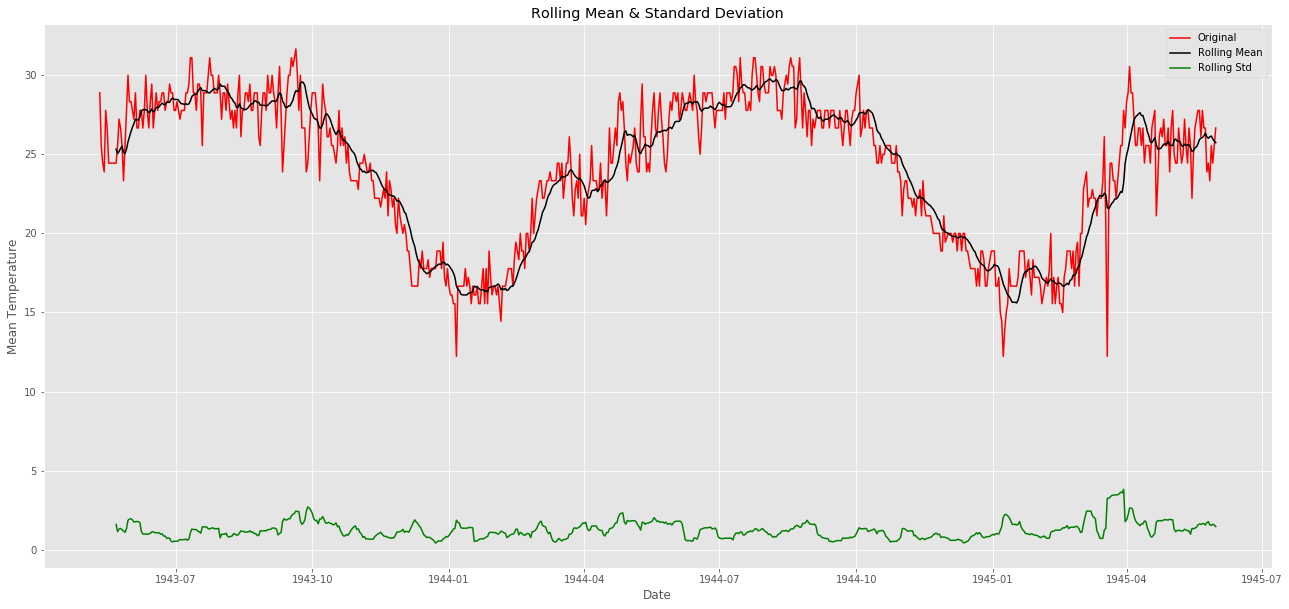

Test statistic:  -1.4095966745887762
p-value:  0.5776668028526354
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [25]:
# verificação estacionário: média, variância (std) e teste de adfuller
check_mean_std(ts)
check_adfuller(ts.MeanTemp)

 - Nosso primeiro critério para estacionário é a média constante. Portanto, falhamos porque a média não é constante, como você pode ver no gráfico (linha preta) acima. (não estacionário)
 - O segundo é a variação constante. Parece constante. (sim estacionário)
   O terceiro é que, se a estatística do teste for menor que o valor crítico, podemos      dizer que a série temporal é estacionária. Vamos olhar:
     - test statistic = -1.4 and critical values = {'1%': -3.439229783394421, '5%':            -2.86545894814762, '10%': -2.5688568756191392}. Test statistic is bigger than          the critical values. (no stationary)
 - Como resultado, temos certeza de que nossa série temporal não é estacionária.
 - Vamos deixar séries temporais estacionárias na próxima parte.   

Tornar uma série temporal estacionária?

 - Como mencionamos anteriormente, há duas razões por trás da não estacionariedade das séries temporais
   - Tendência: média variável ao longo do tempo. Precisamos de média constante para séries estacionárias.
   - Sazonalidade: variações em horário específico. Precisamos de variações constantes para séries estacionárias.
 - Primeiro resolva o problema de tendência (média constante)
   - O método mais popular é a média móvel.
     - Média móvel: temos janelas que levam a média ao longo da amostra 'n' passada. 'n' é o tamanho da janela.

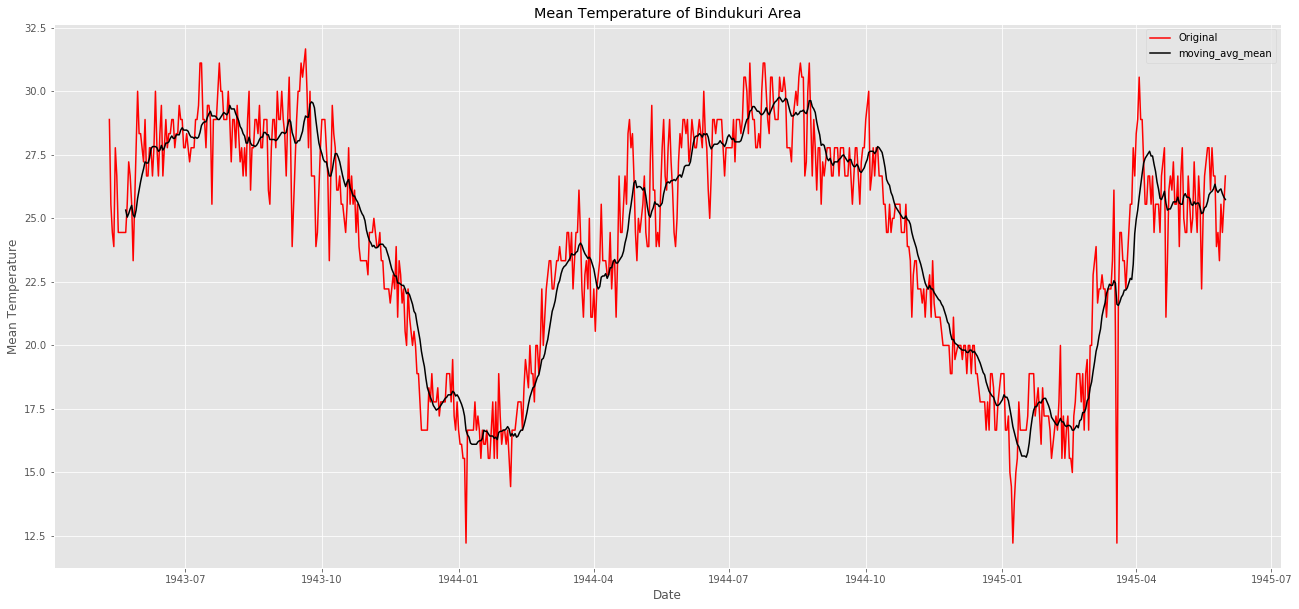

In [26]:
# metodo da média móvel
window_size = 6
moving_avg = ts.rolling(12).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

In [27]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # 6 primeiros é o valor nan devido ao tamanho da janela

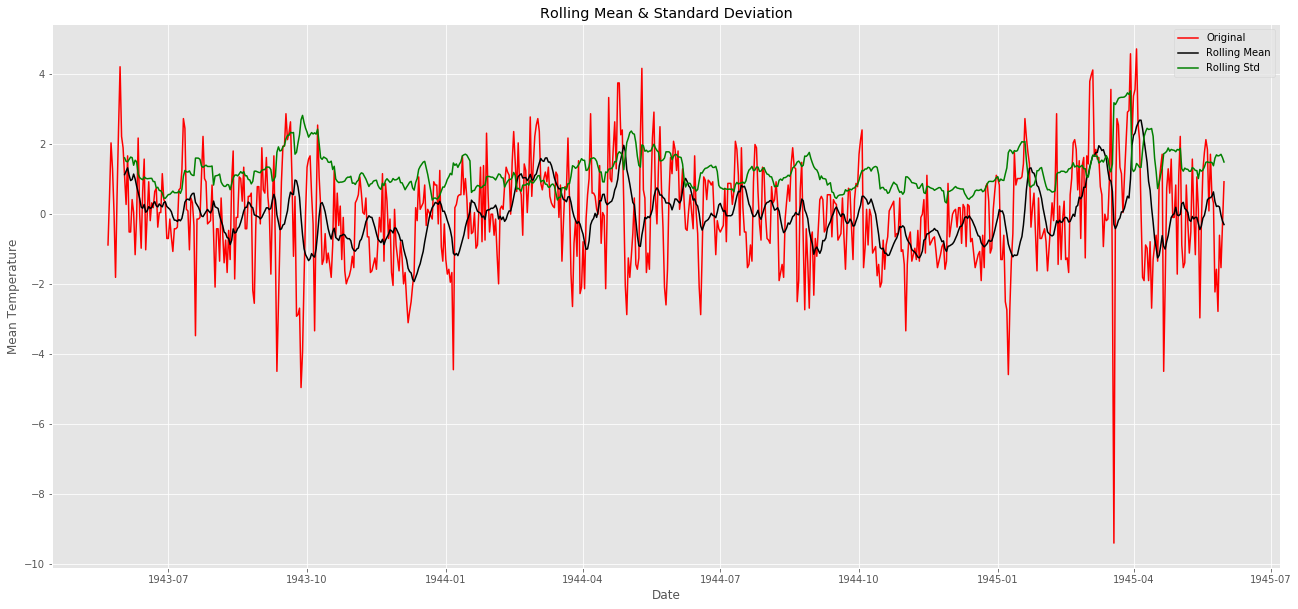

Test statistic:  -6.815306525237559
p-value:  2.0664334081477598e-09
Critical Values: {'1%': -3.4393644334758475, '5%': -2.8655182850048306, '10%': -2.568888486973192}


In [28]:
# verificação do  estacionário: média, variância (std) e teste mais adequado
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.MeanTemp)

- Critérios médios constantes: a média parece constante, como você pode ver no gráfico (linha preta) acima. (sim estacionário)
 - O segundo é a variação constante. Parece constante. (sim estacionário)
 - A estatística do teste é menor que os valores críticos de 1%, portanto, podemos dizer com 99% de confiança que se trata de uma série estacionária. (sim estacionário)
 - Atingimos séries temporais estacionárias. No entanto, vamos analisar mais um método para evitar tendência e sazonalidade.
   - Método de diferenciação: é um dos métodos mais comuns. A idéia é que tenham diferença entre séries temporais e séries temporais alteradas.

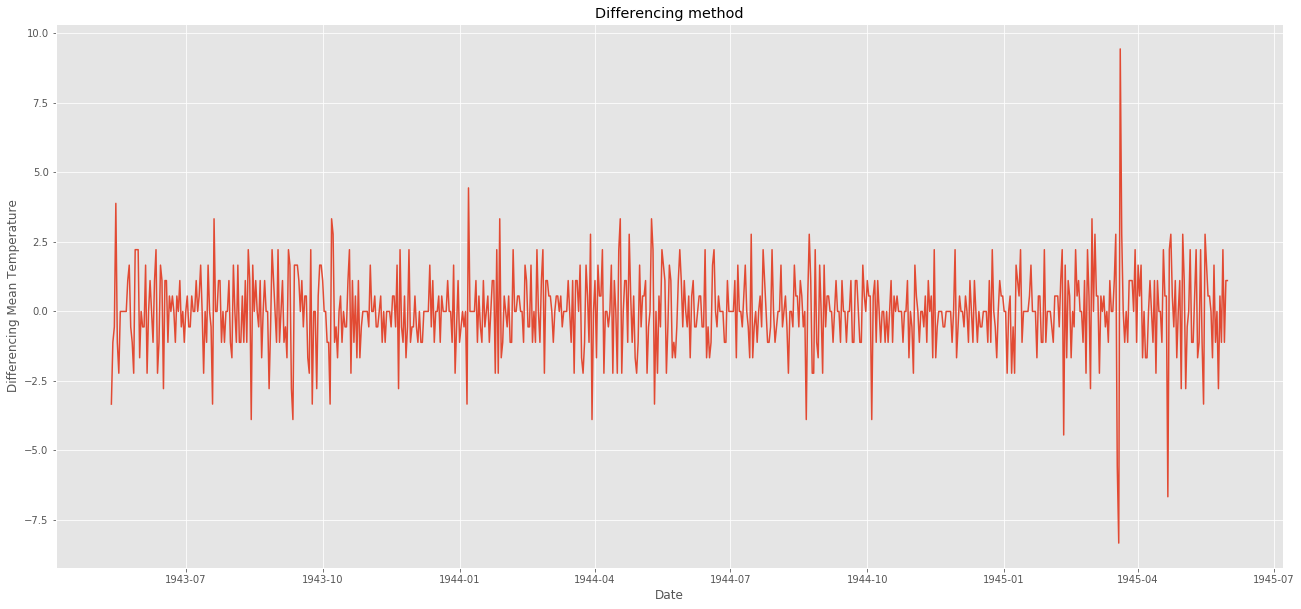

In [29]:
# método de diferenciação
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

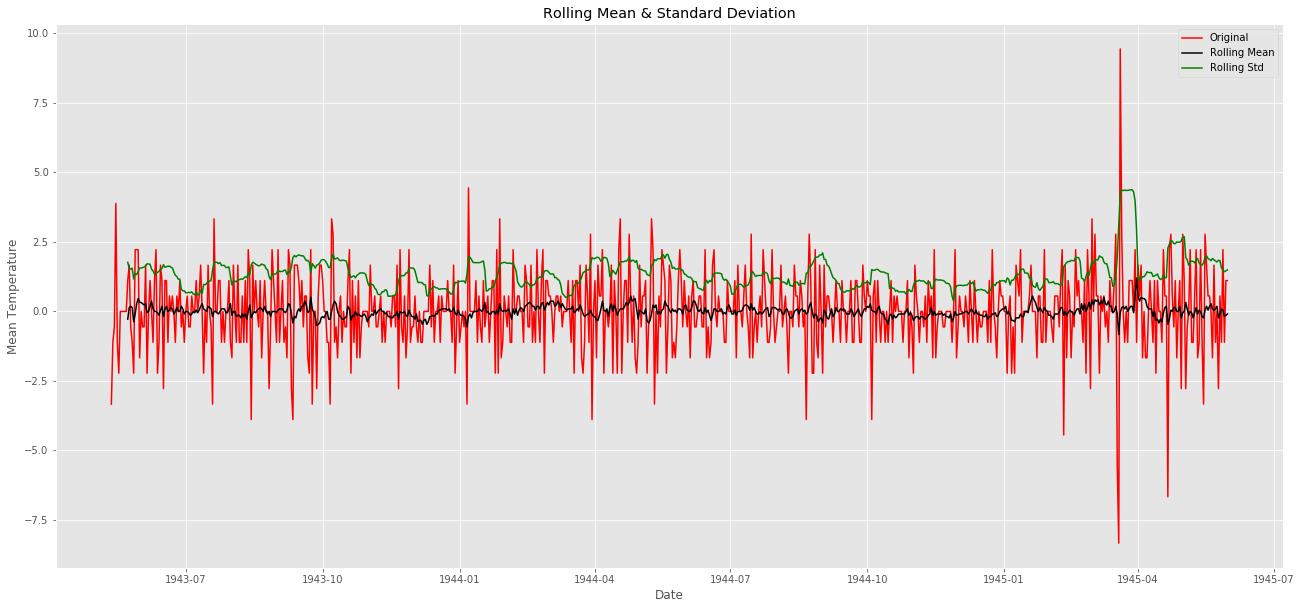

Test statistic:  -11.678955575105368
p-value:  1.7602075693559596e-21
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [30]:
ts_diff.dropna(inplace=True) # devido à mudança, existem valores nan
# verifique estacionário: média, variância (std) e teste de adfuller
check_mean_std(ts_diff)
check_adfuller(ts_diff.MeanTemp)

 - Critérios médios constantes: a média parece constante, como você pode ver no gráfico (linha preta) acima. (é estacionário)
 - O segundo é a variação constante. Parece constante. (é estacionário)
 - A estatística do teste é menor que os valores críticos de 1%, portanto, podemos dizer com 99% de confiança que se trata de uma série estacionária. (é estacionário)

Previsão de uma série temporal
 - Aprendemos dois métodos diferentes, que são métodos móveis de média e diferenciação, para evitar problemas de tendência e sazonalidade
 - Para previsão (previsão), usaremos as séries temporais ts_diff resultantes do método de diferenciação. Não há razão para eu apenas escolher.
 - O método de previsão também é o ARIMA, que é a média móvel integrada auto-regressiva.
   - AR: Auto-regressivo (p): os termos de AR são apenas defasagens na variável dependente. Por exemplo, digamos que p seja 3, usaremos x (t-1), x (t-2) e x (t-3) para prever x (t)
   - I: Integrado (d): Esse é o número de diferenças não sazonais. Por exemplo, no nosso caso, consideramos a diferença de primeira ordem. Então passamos essa variável e colocamos d = 0
   - MA: Médias Móveis (q): os termos MA são erros de previsão atrasados ​​na equação de previsão.
 - (p, d, q) são parâmetros do modelo ARIMA.
 - Para escolher os parâmetros p, d, q, usaremos dois gráficos diferentes.
   - Função de autocorrelação (ACF): Medição da correlação entre séries temporais e versão atrasada das séries temporais.
   - Função de autocorrelação parcial (PACF): mede a correlação entre as séries temporais e a versão defasada das séries temporais, mas após eliminar as variações já explicadas pelas comparações intermediárias.

In [31]:
# ACF e PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

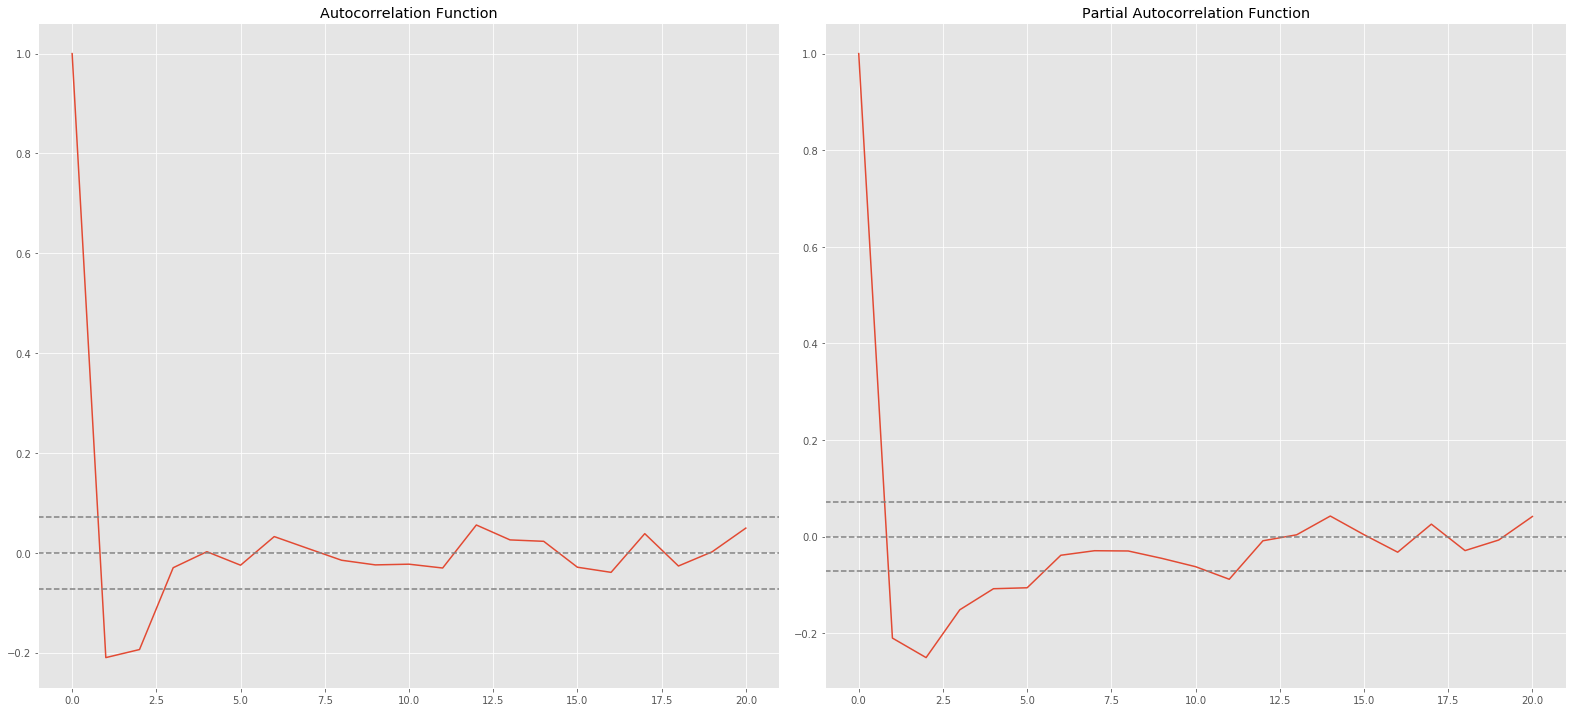

In [32]:
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

 - Duas linhas pontilhadas são os intervalos de confiança. Usamos essas linhas para determinar os valores de 'p' e 'q'
   - Escolhendo p: o valor do atraso no qual o gráfico PACF cruza o intervalo de confiança superior pela primeira vez. p = 1.
   - Escolhendo q: o valor do atraso no qual o gráfico ACF cruza o intervalo de confiança superior pela primeira vez. q = 1.
 - Agora vamos usar (1,0,1) como parâmetros dos modelos ARIMA e prever
   - ARIMA: da biblioteca de estatísticas
   - datetime: vamos usá-lo índices de início e de fim do método de previsão

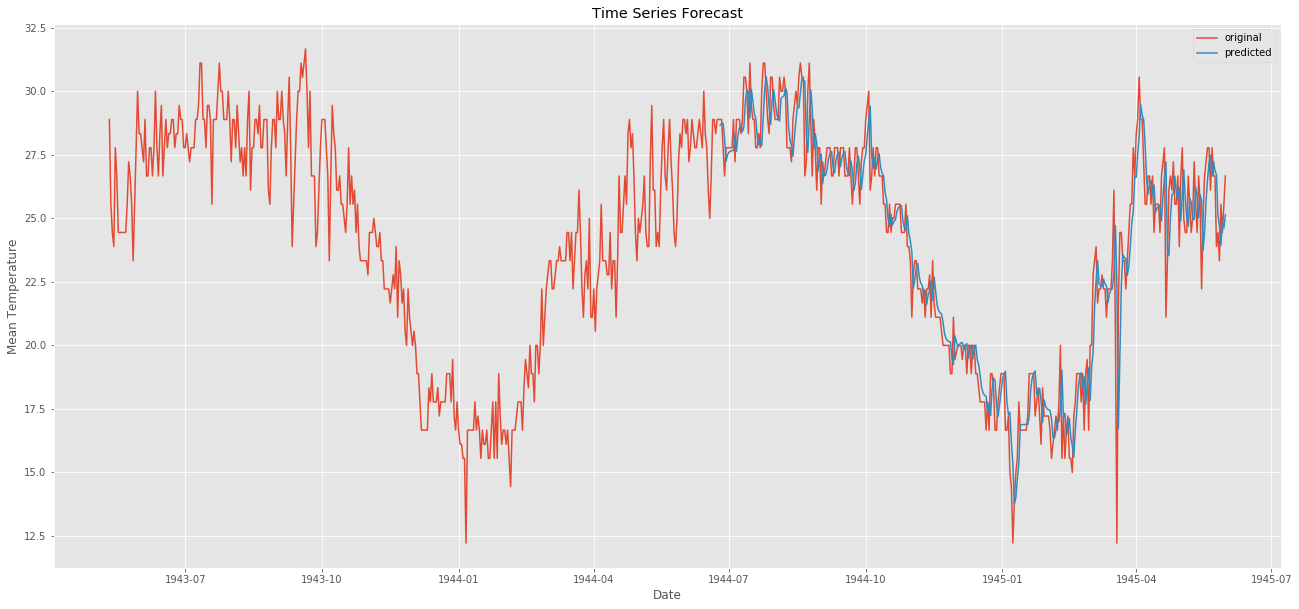

In [33]:
# Biblioteca ARIMA
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit(disp=0)

# Preditivo (previsão)
start_index = datetime(1944, 6, 25)
end_index = datetime(1945, 5, 31)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualização
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

 - Vamos prever e visualizar todo o caminho e encontrar o erro médio quadrático

error:  1.8625819204267187


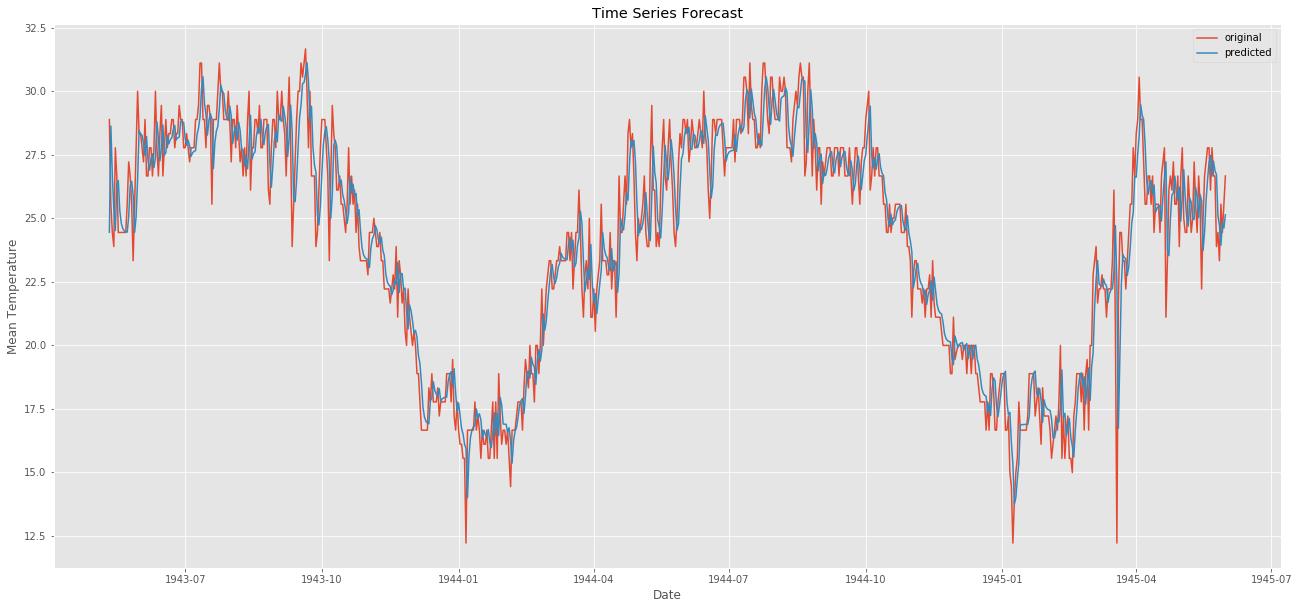

In [34]:
# prever todo o caminho
from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit(disp=0)
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualização
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig('graph.png')

plt.show()

Referências

[Time Series Prediction](http://https://www.kaggle.com/)

[ARIMA](http://https://pt.wikipedia.org/wiki/ARIMA)